In [5]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('videos.csv')

In [6]:
df.head()

,Unnamed: 0,videoId,publishedAt,title,tags,duration,viewCount,likeCount,commentCount
0,0,20_wpq65YB4,2023-06-29T15:01:15Z,James Maddison MASTERCLASS vs Nottingham Fores...,"['James Maddison', 'Maddison', 'masterclass', ...",PT6M2S,27837,949,70
1,1,2nimbJKUqAE,2023-06-29T09:31:36Z,Eberechi Eze with a SENSATIONAL solo goal!,"['Eberechi Eze', 'Eze', 'solo goal', 'solo goa...",PT12S,197633,7495,49
2,2,x3juwrll0n8,2023-06-28T20:04:48Z,James Maddison first time finish vs Spurs,"['James Maddison', 'Maddison', 'Spurs', 'Totte...",PT28S,887069,30172,79
3,3,7O3FzXkm0UY,2023-06-28T19:09:21Z,Arsenal GK denies Kai Havertz ❗️ #shorts,"['Arsenal', 'Kai Havertz', 'Chelsea', 'Havertz...",PT24S,537480,16988,134
4,4,Cj78dlDLgdE,2023-06-28T17:19:57Z,STUNNING Edouard Mendy save! #shorts,"['Edouard Mendy', 'Edouard Mendy save', 'Edoua...",PT8S,202941,7143,40


In [7]:
df = df.drop(['Unnamed: 0'], axis=1) #drop unncessary columns

df['publishedAt'] = pd.to_datetime(df['publishedAt'].str[:10]) #modify publishedAt column data type

df['tags'] = df['tags'].str.strip('[]').str.strip("''").str.split("', '") #modify tags column data type

df['duration'] = df['duration'].str[2:] #modify duration column to seconds column

df['hours'] = pd.Series(np.int64(np.zeros(df.shape[0])))
df.loc[df['duration'].str.contains('H'), 'hours'] = df['duration'].str.split('H').str[0]
df['hours'] = df['hours'].astype('int64')
df['duration'] = df['duration'].str.split('H').str[-1]

df['minutes'] = pd.Series(np.int64(np.zeros(df.shape[0])))
df.loc[df['duration'].str.contains('M'), 'minutes'] = df['duration'].str.split('M').str[0]
df['minutes'] = df['minutes'].astype('int64')
df['duration'] = df['duration'].str.split('M').str[-1]

df['seconds'] = pd.Series(np.int64(np.zeros(df.shape[0])))
df.loc[df['duration'].str.contains('S'), 'seconds'] = df['duration'].str.split('S').str[0]
df['seconds'] = df['seconds'].astype('int64')

df['seconds'] = df['hours'] * 3600 + df['minutes'] * 60 + df['seconds']
df = df.drop(['duration', 'hours', 'minutes'], axis=1)

df.head()

,videoId,publishedAt,title,tags,viewCount,likeCount,commentCount,seconds
0,20_wpq65YB4,2023-06-29,James Maddison MASTERCLASS vs Nottingham Fores...,"[James Maddison, Maddison, masterclass, Totten...",27837,949,70,362
1,2nimbJKUqAE,2023-06-29,Eberechi Eze with a SENSATIONAL solo goal!,"[Eberechi Eze, Eze, solo goal, solo goal footb...",197633,7495,49,12
2,x3juwrll0n8,2023-06-28,James Maddison first time finish vs Spurs,"[James Maddison, Maddison, Spurs, Tottenham, T...",887069,30172,79,28
3,7O3FzXkm0UY,2023-06-28,Arsenal GK denies Kai Havertz ❗️ #shorts,"[Arsenal, Kai Havertz, Chelsea, Havertz, Kai H...",537480,16988,134,24
4,Cj78dlDLgdE,2023-06-28,STUNNING Edouard Mendy save! #shorts,"[Edouard Mendy, Edouard Mendy save, Edouard Me...",202941,7143,40,8


In [8]:
df.describe()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   videoId       500 non-null    object        
 1   publishedAt   500 non-null    datetime64[ns]
 2   title         500 non-null    object        
 3   tags          500 non-null    object        
 4   viewCount     500 non-null    int64         
 5   likeCount     500 non-null    int64         
 6   commentCount  500 non-null    int64         
 7   seconds       500 non-null    int64         
dtypes: datetime64[ns](1), int64(4), object(3)
memory usage: 31.4+ KB


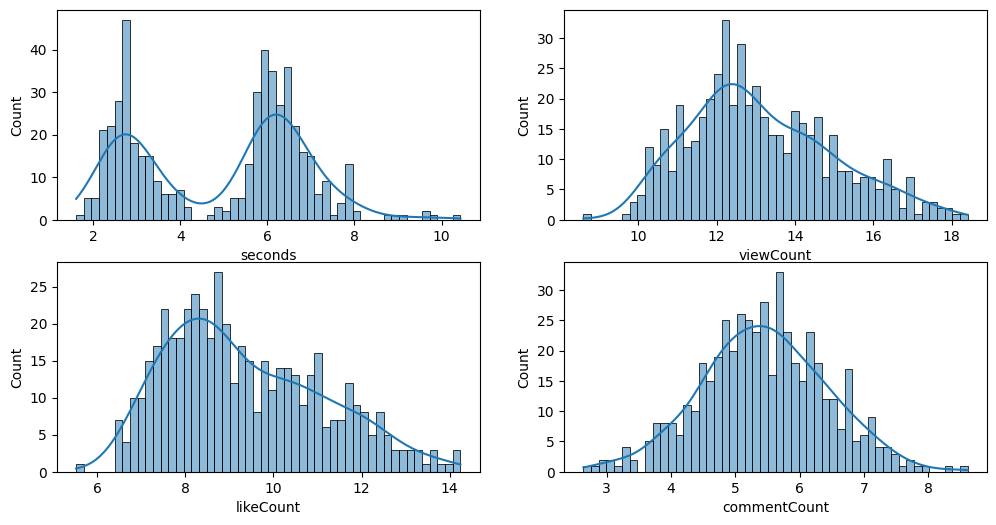

In [74]:
plt.figure(figsize = (12, 6))

plt.subplot(221)
sns.histplot(np.log(df['seconds'] + 1), kde=True, bins = 50)

plt.subplot(222)
sns.histplot(np.log(df['viewCount'] + 1), kde=True, bins = 50)

plt.subplot(223)
sns.histplot(np.log(df['likeCount'] + 1), kde=True, bins = 50)

plt.subplot(224)
sns.histplot(np.log(df['commentCount'] + 1), kde=True, bins = 50)

plt.show()

[]

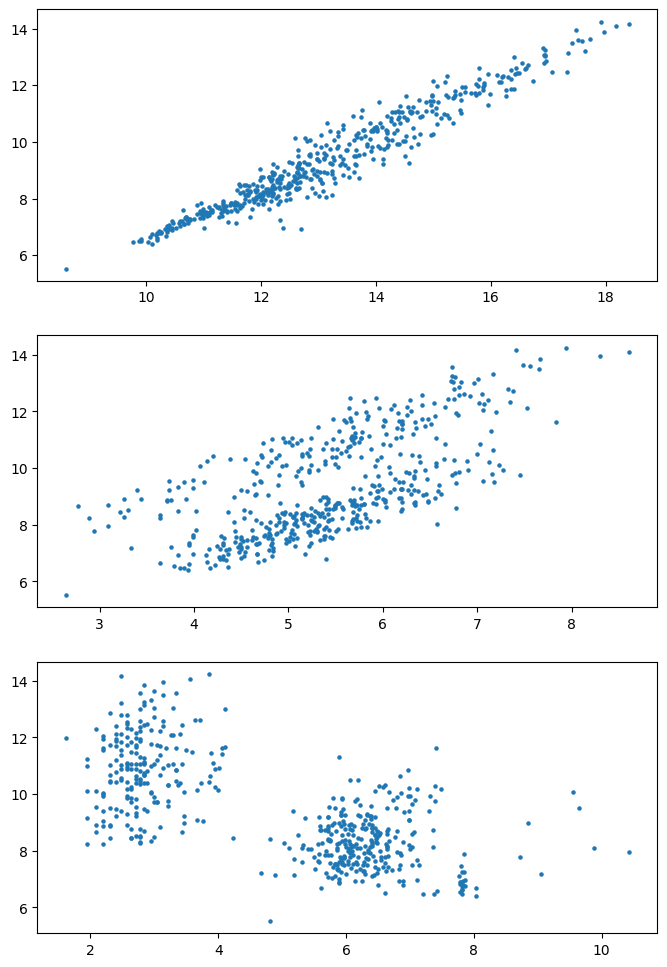

In [95]:
plt.figure(figsize = (8, 12))

plt.subplot(311)
plt.scatter(np.log(df['viewCount'] + 1), np.log(df['likeCount'] + 1), s=5)

plt.subplot(312)
plt.scatter(np.log(df['commentCount'] + 1), np.log(df['likeCount'] + 1), s=5)

plt.subplot(313)
plt.scatter(np.log(df['seconds'] + 1), np.log(df['likeCount'] + 1), s=5)

plt.plot()